In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pywt
from pywt import wavedec

In [2]:
# Arrhythmia Dataset avec 5 diagnostics
# Number of Samples: 109446
# Number of Categories: 5
# Sampling Frequency: 125Hz
# Data Source: Physionet's MIT-BIH Arrhythmia Dataset
# Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

dftrain=pd.read_csv('mitbih_train.csv', header=None) # Arrhythmia Dataset training 87554 samples
dftest=pd.read_csv('mitbih_test.csv', header=None)   # Arrhythmia Dataset set 21892 samples

print(dftrain.shape)
print(dftest.shape)

display(dftrain.head())
display(dftest.head())

(87554, 188)
(21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
dftrain

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [207]:
ecg=dftrain.loc[130,0:187]

In [208]:
ecg

0      0.962963
1      0.486772
2      0.346561
3      0.179894
4      0.116402
         ...   
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    0.000000
Name: 130, Length: 188, dtype: float64

In [169]:
len(ecg)

188

In [170]:
(cA, cD) = pywt.dwt(ecg,'db1')

In [171]:
cA

array([1.34662245, 0.65511362, 0.24436779, 0.16811118, 0.07625661,
       0.07452351, 0.09012146, 0.08665525, 0.08665524, 0.09532077,
       0.12131734, 0.1403815 , 0.15424633, 0.17157738, 0.19064154,
       0.20970569, 0.21837121, 0.22010432, 0.20970569, 0.21490501,
       0.19757396, 0.18544222, 0.1767767 , 0.15078012, 0.14558081,
       0.13864839, 0.14558081, 0.15597944, 0.16117875, 0.19064154,
       0.20623948, 0.2859623 , 0.34315475, 0.32235751, 0.26516504,
       0.18197601, 0.16984428, 0.17157738, 0.1403815 , 0.04679383,
       0.64991433, 1.31542658, 1.20450787, 0.33102303, 0.26169883,
       0.1403815 , 0.13518218, 0.13691529, 0.13518218, 0.14731391,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [172]:
cD

array([ 0.03639519,  0.30849265, -0.02599658,  0.04679383,  0.00693242,
       -0.01213173,  0.00346621, -0.01733105,  0.        , -0.0017331 ,
        0.01386484, -0.00866552,  0.00866552, -0.00519931,  0.01039863,
        0.00519932,  0.01386484,  0.00519931,  0.00866552,  0.        ,
        0.01039863, -0.00519931,  0.01733105,  0.0017331 ,  0.00693242,
       -0.00693242, -0.00346621, -0.01039863, -0.01213173, -0.01039863,
        0.00173311, -0.03986141, -0.00693242,  0.00346621,  0.01559794,
        0.00519932, -0.00346621, -0.01213173,  0.02253036, -0.04679383,
       -0.21663811, -0.09878699,  0.1507801 ,  0.09878699,  0.02946279,
        0.00519931, -0.00693242, -0.0017331 , -0.00346621, -0.01213173,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [173]:
(cA, cD) = pywt.dwt(cA,'db1')

In [174]:
cA

array([1.41544115, 0.29166667, 0.10661765, 0.125     , 0.12867647,
       0.18504902, 0.23039216, 0.28308824, 0.31004902, 0.30024511,
       0.27083334, 0.23161765, 0.2009804 , 0.2132353 , 0.24877452,
       0.34803922, 0.47058823, 0.31617647, 0.24142157, 0.13235294,
       1.38970588, 1.08578432, 0.28431373, 0.19240196, 0.1997549 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [175]:
cD

array([ 0.48897059,  0.05392157,  0.00122549,  0.00245098, -0.00612745,
       -0.01348039, -0.0122549 , -0.01348039, -0.00122549, -0.00367647,
        0.00857843,  0.01838236,  0.00490196, -0.00735294, -0.02083334,
       -0.05637255,  0.01470587,  0.05882353, -0.00122549,  0.06617647,
       -0.47058822,  0.61764705,  0.08578431, -0.00122549, -0.00857843,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [209]:
coeff_array = pywt.coeffs_to_array(pywt.wavedec(ecg, 'db1', level=5))[0]

In [210]:
coeff_slice = pywt.coeffs_to_array(pywt.wavedec(ecg, 'db1', level=5))[1]

In [211]:
type(coeff)

numpy.ndarray

In [212]:
len(coeff)

189

In [213]:
coeff_slice

[(slice(None, 6, None),),
 {'d': (slice(6, 12, None),)},
 {'d': (slice(12, 24, None),)},
 {'d': (slice(24, 48, None),)},
 {'d': (slice(48, 95, None),)},
 {'d': (slice(95, 189, None),)}]

In [195]:
coeff_array

array([ 9.77904415e-01,  7.50867692e-01,  1.45407498e+00,  7.06240239e-02,
        0.00000000e+00,  0.00000000e+00,  3.92981513e-01,  3.59619289e-02,
       -6.33449827e-01,  7.06240239e-02,  0.00000000e+00,  0.00000000e+00,
        7.37745084e-01, -9.98774525e-02,  5.39215654e-02, -9.12990216e-02,
        2.06495095e-01,  9.99387253e-01,  9.98774525e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.94628553e-01, -1.29982883e-02, -3.98614119e-02, -3.72617601e-02,
        6.93241374e-03,  2.77296813e-02, -8.66552376e-03, -7.01907425e-02,
        1.09185599e-01,  7.71231641e-02,  2.14905000e-01,  6.49914309e-02,
        1.41248048e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.88970585e-01,  5.39215654e-02,  1.22549012e-03,  2.45098025e-03,
       -6.12745434e-03, -

In [196]:
df_new=pd.DataFrame(coeff_array)

In [197]:
df_new

,0
0,0.977904
1,0.750868
2,1.454075
3,0.070624
4,0.000000
...,...
184,0.000000
185,0.000000
186,0.000000
187,0.000000


In [198]:
df_new.T

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,0.977904,0.750868,1.454075,0.070624,0.0,0.0,0.392982,0.035962,-0.63345,0.070624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
def get_dwt_features(signal, waveletname, level):
    n=signal.shape[0]
    m=signal.shape[1]
    print(n)
    print(m)
    for i in range(n):
        coeffs=pywt.coeffs_to_array(pywt.wavedec(signal.iloc[i], waveletname, level=level))[0]
#        print(i,"-",len(coeffs))
#        print(coeffs)
        if i==0 :
            df_new=pd.DataFrame(coeffs).T
        else:
            df_new=df_new.append(pd.DataFrame(coeffs).T)
    df_new.index = range(n)
    return df_new

In [153]:
df_dwt1=get_dwt_features(dftrain.iloc[0:20000,0:187], 'db1',5)

20000
20000
187


In [154]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,0.977904,0.750868,1.454075,0.070624,0.000000,0.0,0.392982,0.035962,-0.633450,0.070624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.007778,0.603861,0.369670,0.893453,0.100727,0.0,0.213039,0.265417,0.118858,-0.680918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.045371,0.422831,0.584796,0.000000,0.000000,0.0,-0.116577,0.081700,-0.392731,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.939065,0.645577,1.194952,0.000000,0.000000,0.0,0.299348,-0.449267,-0.350135,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.493058,0.520371,0.204995,1.350308,0.284669,0.0,0.395880,0.377622,-0.060585,-0.858985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.395584,1.120822,0.449977,0.017307,0.000000,0.0,0.225813,-0.233230,0.192847,0.017307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,1.314314,1.972910,1.993466,0.036178,0.000000,0.0,0.281609,0.067833,0.312031,0.036178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,1.242882,1.840002,2.267969,0.347383,0.000000,0.0,0.368799,-0.107808,-0.728886,0.347383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,1.121447,0.920479,1.057559,0.286564,0.000000,0.0,0.196005,0.198486,-0.277260,0.286564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
df_dwt2=get_dwt_features(dftrain.iloc[20000:40000,0:187], 'db1',5)

20000
20000
187


In [156]:
df_dwt3=get_dwt_features(dftrain.iloc[40000:60000,0:187], 'db1',5)

20000
20000
187


In [159]:
df_dwt4=get_dwt_features(dftrain.iloc[60000:80000,0:187], 'db1',5)

20000
20000
187


In [160]:
df_dwt5=get_dwt_features(dftrain.iloc[80000:87554,0:187], 'db1',5)

7554
7554
187


In [23]:
def get_ecg_features(ecg_data, ecg_labels, waveletname):
    list_features = []
    list_unique_labels = list(set(ecg_labels))
    list_labels = [list_unique_labels.index(elem) for elem in ecg_labels]
    for signal in ecg_data:
        list_coeff = pywt.wavedec(signal, waveletname)
        features = []
        for coeff in list_coeff:
            features += get_features(coeff)
        list_features.append(features)
    return list_features, list_labels

In [161]:
list_df_dwt = [df_dwt1,df_dwt2,df_dwt3,df_dwt4,df_dwt5]

In [162]:
df_dwt = pd.concat(list_df_dwt)

In [163]:
df_dwt

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,0.977904,0.750868,1.454075,0.070624,0.000000,0.0,0.392982,0.035962,-0.633450,0.070624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.007778,0.603861,0.369670,0.893453,0.100727,0.0,0.213039,0.265417,0.118858,-0.680918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.045371,0.422831,0.584796,0.000000,0.000000,0.0,-0.116577,0.081700,-0.392731,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.939065,0.645577,1.194952,0.000000,0.000000,0.0,0.299348,-0.449267,-0.350135,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.493058,0.520371,0.204995,1.350308,0.284669,0.0,0.395880,0.377622,-0.060585,-0.858985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7549,1.398707,1.505393,1.466316,0.864655,0.000000,0.0,0.483190,0.068850,-0.207170,0.781539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7550,2.475463,3.691687,2.705862,1.887386,0.000000,0.0,-0.978754,0.795495,0.025338,0.661734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7551,2.347883,3.614181,2.638663,1.867339,0.000000,0.0,-0.421378,0.031026,0.133484,1.210740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7552,0.750965,0.624760,0.784978,1.204767,0.000000,0.0,0.618495,-0.068025,-0.017901,0.850318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
df_dwt.index = range(len(df_dwt))

In [165]:
df_dwt

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,0.977904,0.750868,1.454075,0.070624,0.000000,0.0,0.392982,0.035962,-0.633450,0.070624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.007778,0.603861,0.369670,0.893453,0.100727,0.0,0.213039,0.265417,0.118858,-0.680918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.045371,0.422831,0.584796,0.000000,0.000000,0.0,-0.116577,0.081700,-0.392731,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.939065,0.645577,1.194952,0.000000,0.000000,0.0,0.299348,-0.449267,-0.350135,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.493058,0.520371,0.204995,1.350308,0.284669,0.0,0.395880,0.377622,-0.060585,-0.858985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,1.398707,1.505393,1.466316,0.864655,0.000000,0.0,0.483190,0.068850,-0.207170,0.781539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,2.475463,3.691687,2.705862,1.887386,0.000000,0.0,-0.978754,0.795495,0.025338,0.661734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,2.347883,3.614181,2.638663,1.867339,0.000000,0.0,-0.421378,0.031026,0.133484,1.210740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.750965,0.624760,0.784978,1.204767,0.000000,0.0,0.618495,-0.068025,-0.017901,0.850318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
df_dwt.iloc[0,0:188]

0      0.977904
1      0.750868
2      1.454075
3      0.070624
4      0.000000
         ...   
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    0.000000
Name: 0, Length: 188, dtype: float64

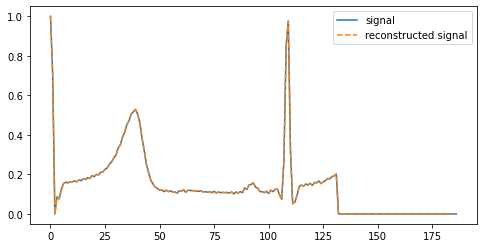

In [239]:
coeffs_from_arr = pywt.array_to_coeffs(df_dwt.iloc[70000,0:188], coeff_slice,output_format='wavedecn')
reconstructed_signal = pywt.waverecn(coeffs_from_arr, wavelet='db1')

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dftrain.iloc[70000,0:187], label='signal')
ax.plot(reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper right')
plt.show()

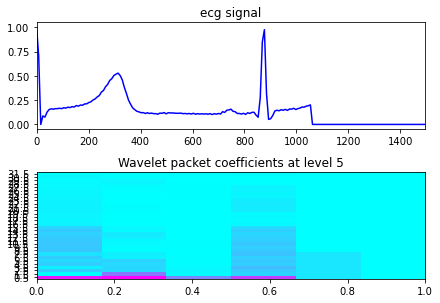

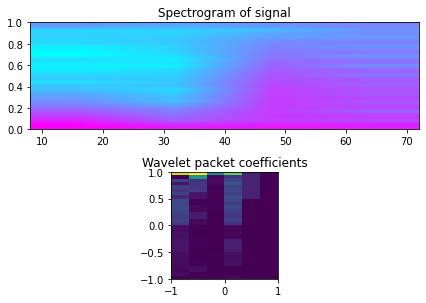

In [233]:
x = np.linspace(0, 1496, num=187)
data=dftrain.iloc[70000,0:187]

wavelet = 'db1'
level = 5
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.cool

# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

# Show signal and wavelet packet coefficients
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("ecg signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5))

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
fig2.subplots_adjust(hspace=0.4, bottom=.03, left=.07, right=.97, top=.92)
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")


plt.show()